![](dataset/51.jpg)

(a) Display the image

In [13]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [295]:
large = cv2.imread("dataset/mandrill-large.tiff")
small = cv2.imread("dataset/mandrill-small.tiff")

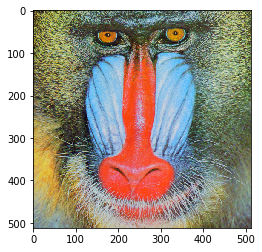

In [284]:
plt.imshow(cv2.cvtColor(large, cv2.COLOR_BGR2RGB))

`numpy.random.choice(a, size=None, replace=True, p=None)`

In [356]:
def kmeans(X, k, tol):
    means = np.ones((k, 3)) * (-1)
    hist = [0] * k
    loss = [0]
    i = 0
    while i < k:
        ranM = np.random.randint(0, X.shape[0])
        ranN = np.random.randint(0, X.shape[1])
        if means[np.all(means == X[ranM, ranN], axis = 1)].size == 0:
            means[i] = X[ranM, ranN]
            i += 1

    Xtemp = X.reshape((X.shape[0], -1, 1, 3)).copy()
    means = means.reshape(1, 1, k, 3)
    
    while True:
        sqr = np.sqrt(np.sum((Xtemp - means) ** 2, axis = 3))
        idx = np.argmin(sqr, axis = 2)
        loss.append(np.mean(np.min(sqr, axis = 2)))
        
        if abs(loss[-2] - loss[-1]) <= tol:
            break

        for i in range(k):
            means[0, 0, i, :] = np.mean(X[idx == i], axis = 0)
            
    
    for i in range(k):
        Xtemp[idx == i] = means[0, 0, i,:]
        hist[i] = idx[idx == i].size
        
    Xtemp = Xtemp.reshape((X.shape[0], X.shape[1], 3))
    return Xtemp, idx, hist, loss

In [363]:
output, means, hist, loss = kmeans(large, 16, 1e-4)

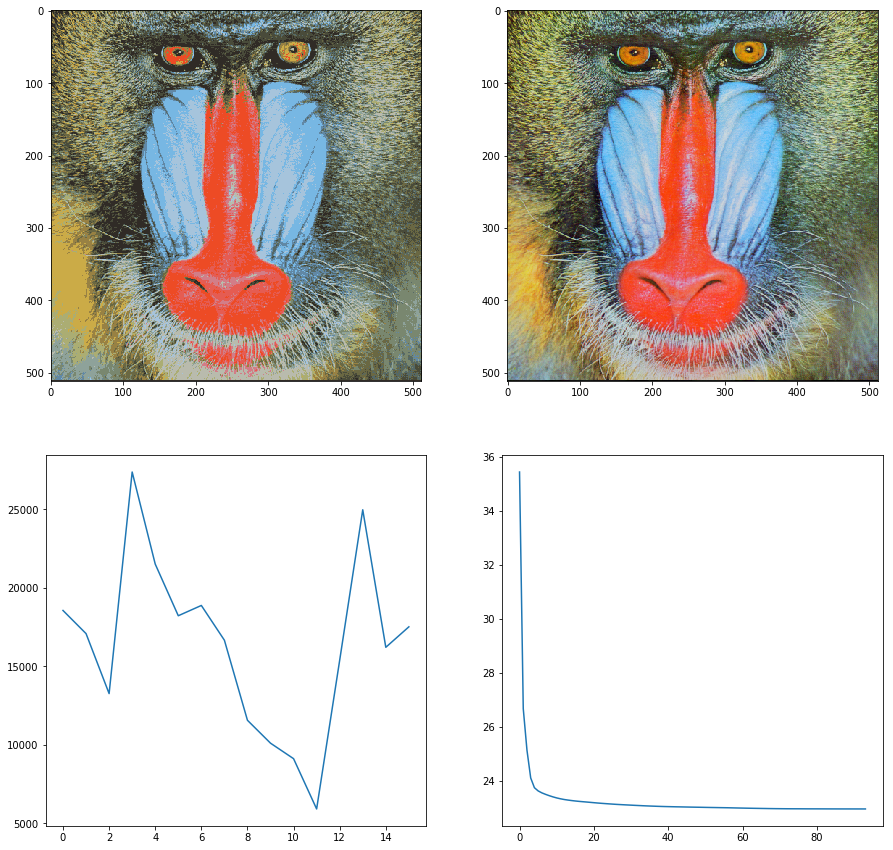

In [367]:
f, axes = plt.subplots(2, 2, figsize = (15, 15))
axes[0][0].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axes[0][1].imshow(cv2.cvtColor(large, cv2.COLOR_BGR2RGB))
axes[1][0].plot(hist)
axes[1][1].plot(loss[1:])

In [11]:
def kmeanspp():
    pass